In [1]:
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

from sklearn import metrics
from pathlib import Path
import os

import pandas as pd
import numpy as np

import re

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df1 = pd.read_csv('business_data.csv')
df2 = pd.read_csv('education_data.csv')
df3 = pd.read_csv('entertainment_data.csv')
df4 = pd.read_csv('sports_data.csv')
df5 = pd.read_csv('technology_data.csv')

In [3]:
df_all=[df1,df2,df3,df4,df5]
df = pd.concat(df_all)

In [4]:
df.shape

(10000, 5)

In [5]:
df['category'].value_counts()

category
business         2000
education        2000
entertainment    2000
sports           2000
technology       2000
Name: count, dtype: int64

In [6]:
df= shuffle(df)

In [7]:
df.head()

,headlines,description,content,url,category
1894,Why Dyson combined sound and clean air: The ne...,Dyson’s new headphone that combines air purifi...,“At the core of our actions is the drive to so...,https://indianexpress.com/article/technology/t...,technology
136,"Rupee closes little changed, awaits key US inf...","Late on Monday, Bloomberg Index Services propo...",The Indian rupee ended little changed on Tuesd...,https://indianexpress.com/article/business/mar...,business
1996,SAMS Odisha invites application for admission ...,The admission process will commence with accep...,"The Directorate of Higher Secondary Education,...",https://indianexpress.com/article/education/sa...,education
1216,Australian Open director: Novak Djokovic’s ham...,Djokovic won the trophy at Melbourne Park on S...,Australian Open tournament director Craig Tile...,https://indianexpress.com/article/sports/tenni...,sports
1471,Suryakumar Yadav continues to lead ICC T20 bat...,Gill achieved a career-best position after sma...,India’s Suryakumar Yadav remained static at th...,https://indianexpress.com/article/sports/crick...,sports


In [8]:
df['text'] = df['headlines'] + ' ' + df['description'] + ' ' + df['content']
df = df.drop(['headlines', 'description', 'content', 'url'], axis=1)
df.head()

,category,text
1894,technology,Why Dyson combined sound and clean air: The ne...
136,business,"Rupee closes little changed, awaits key US inf..."
1996,education,SAMS Odisha invites application for admission ...
1216,sports,Australian Open director: Novak Djokovic’s ham...
1471,sports,Suryakumar Yadav continues to lead ICC T20 bat...


In [9]:
df.reset_index(drop=True)
df.head()

,category,text
1894,technology,Why Dyson combined sound and clean air: The ne...
136,business,"Rupee closes little changed, awaits key US inf..."
1996,education,SAMS Odisha invites application for admission ...
1216,sports,Australian Open director: Novak Djokovic’s ham...
1471,sports,Suryakumar Yadav continues to lead ICC T20 bat...


In [10]:
categories = ['business', 'education', 'entertainment', 'sports', 'technology']

df['category'] = df['category'].replace(categories, [0,1,2,3,4])

df.head()


C:\Users\hemam\AppData\Local\Temp\ipykernel_28860\1287993730.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['category'] = df['category'].replace(categories, [0,1,2,3,4])


,category,text
1894,4,Why Dyson combined sound and clean air: The ne...
136,0,"Rupee closes little changed, awaits key US inf..."
1996,1,SAMS Odisha invites application for admission ...
1216,3,Australian Open director: Novak Djokovic’s ham...
1471,3,Suryakumar Yadav continues to lead ICC T20 bat...


In [11]:
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, clean_text, lemmatize=True, remove_stop_words=True):
    tokens = text.split()
    if clean_text:
        tokens = re.sub(r'\s+', "_", re.sub(r'[^\w\s]', '', text.lower()))
    if remove_stop_words:
        tokens = [t for t in tokens if t.lower() not in sw_list]
    if lemmatize:
        tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

In [12]:

text_lengths = df['text'].str.len()
word_counts = df['text'].str.split().map(len)
category_distribution = df['category'].value_counts()

word_freq = Counter(" ".join(df['text']).split())

text_lengths, word_counts, category_distribution, word_freq

(1894     948
 136     2024
 1996    1061
 1216    2327
 1471    2622
         ... 
 1073    4422
 1686     849
 1866     489
 1752    1351
 1571    1138
 Name: text, Length: 10000, dtype: int64,
 1894    154
 136     321
 1996    179
 1216    412
 1471    433
        ... 
 1073    765
 1686    122
 1866     83
 1752    226
 1571    180
 Name: text, Length: 10000, dtype: int64,
 category
 4    2000
 0    2000
 1    2000
 3    2000
 2    2000
 Name: count, dtype: int64,
 Counter({'the': 126616,
          'to': 67686,
          'and': 62457,
          'of': 59446,
          'in': 57523,
          'a': 49812,
          'for': 28996,
          'on': 25565,
          'is': 23028,
          'The': 21062,
          'with': 19507,
          'that': 18085,
          'at': 16479,
          'have': 14209,
          'from': 13897,
          'as': 13196,
          'was': 13043,
          'has': 12436,
          'an': 11949,
          'by': 11894,
          'will': 11247,
          'be': 10980,
    

In [13]:
most_common_words = word_freq.most_common(10)
most_common_words

[('the', 126616),
 ('to', 67686),
 ('and', 62457),
 ('of', 59446),
 ('in', 57523),
 ('a', 49812),
 ('for', 28996),
 ('on', 25565),
 ('is', 23028),
 ('The', 21062)]

In [17]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
   
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

In [18]:
df['processed_text'] = df['text'].apply(preprocess_text)
df[['text', 'processed_text']].head()

,text,processed_text
1894,Why Dyson combined sound and clean air: The ne...,dyson combined sound clean air new zone headph...
136,"Rupee closes little changed, awaits key US inf...",rupee close little changed awaits key u inflat...
1996,SAMS Odisha invites application for admission ...,sam odisha invite application admission class ...
1216,Australian Open director: Novak Djokovic’s ham...,australian open director novak djokovics hamst...
1471,Suryakumar Yadav continues to lead ICC T20 bat...,suryakumar yadav continues lead icc batting ch...


In [19]:
X = df['text']
y = df['category']

X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size = 0.2 , stratify = y , random_state = 42)

In [20]:
! pip install wordcloud

In [21]:
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))


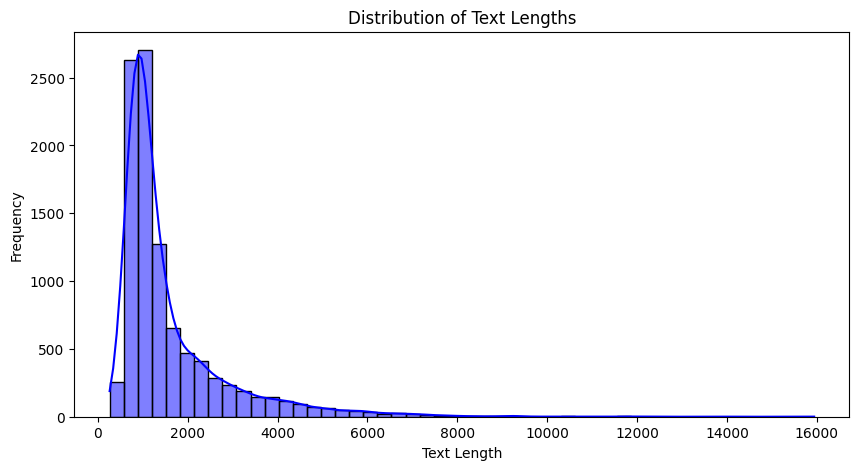

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

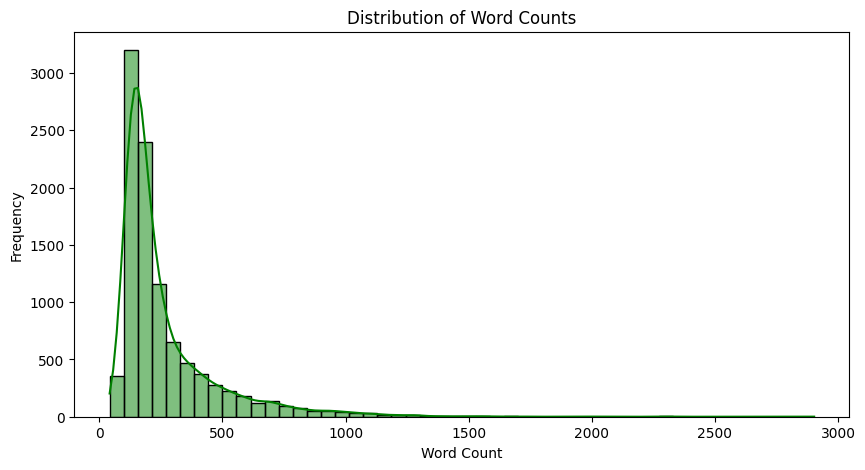

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=50, kde=True, color='green')
plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

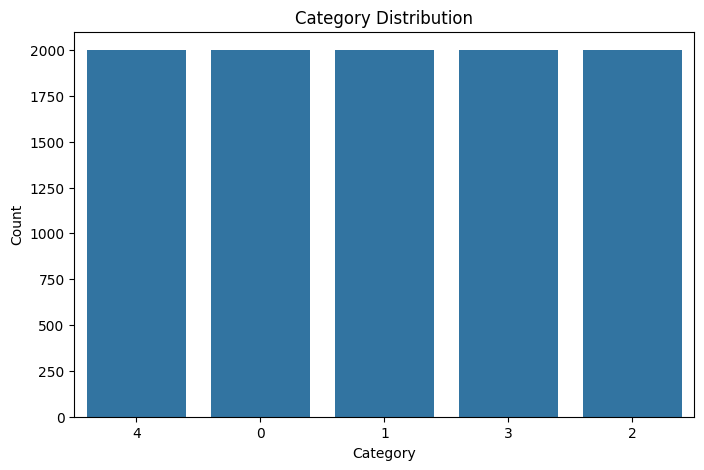

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

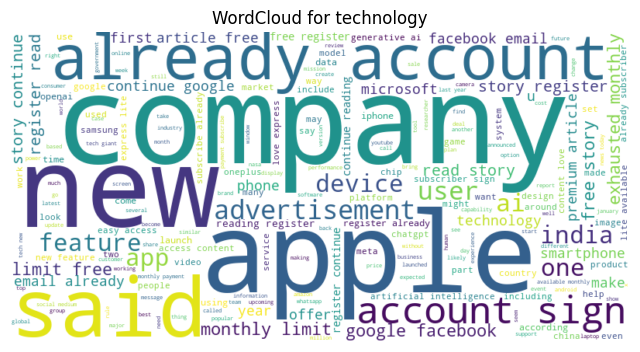

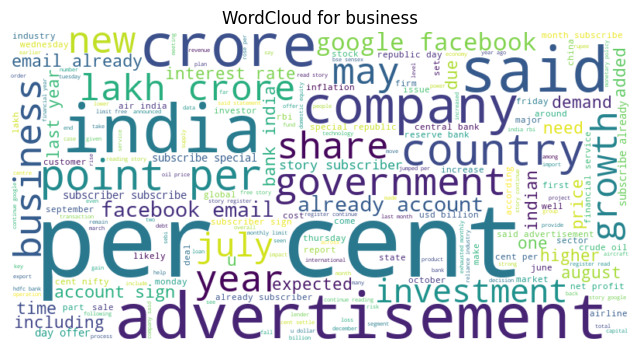

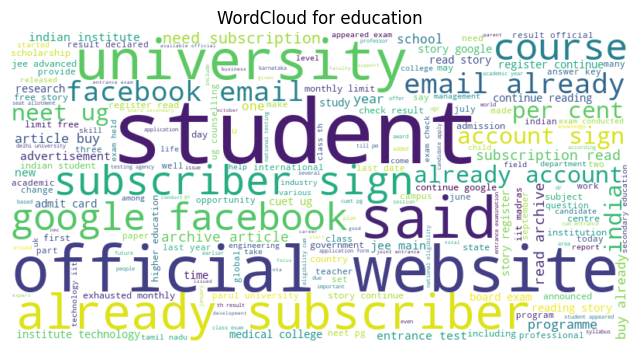

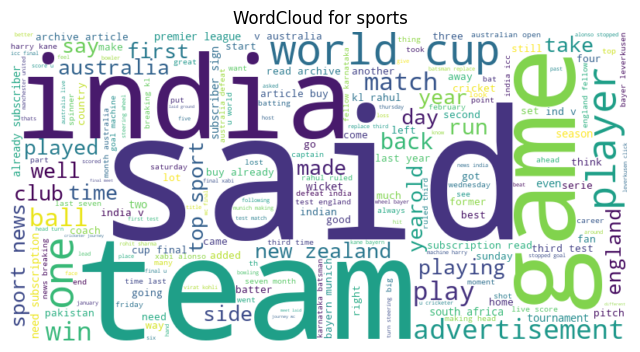

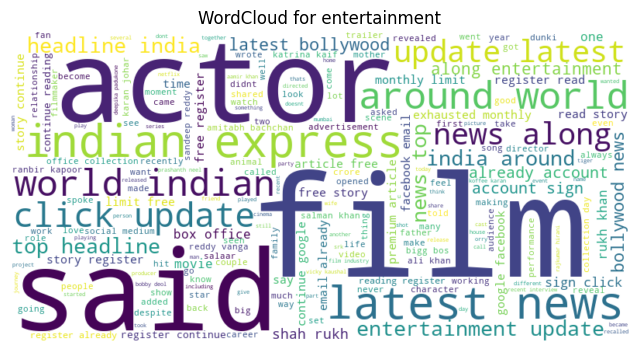

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

category_mapping = {0: 'business', 1: 'education', 2: 'entertainment', 3: 'sports', 4: 'technology'}

for category in df['category'].unique():
    plt.figure(figsize=(8, 6))
    text = " ".join(df[df['category'] == category]['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {category_mapping[category]}")  
    plt.show()


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       400
           1       0.99      0.99      0.99       400
           2       1.00      0.99      1.00       400
           3       0.99      0.99      0.99       400
           4       0.97      0.97      0.97       400

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.98      0.99      2000



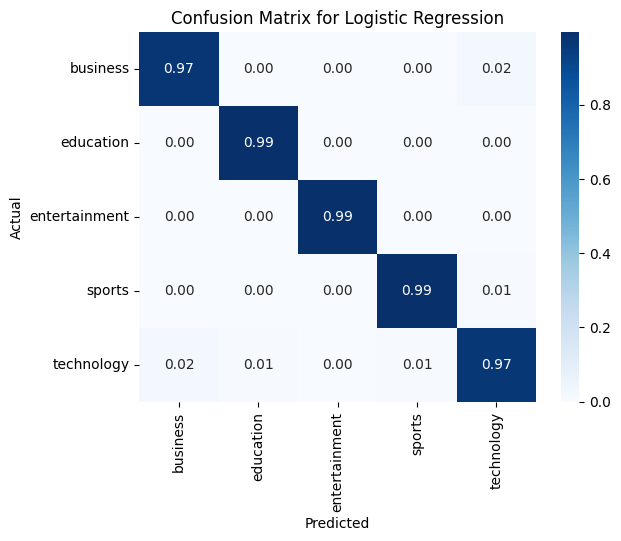

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df['processed_text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  
X_test_tfidf = tfidf_vectorizer.transform(X_test)      

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)  # Train the model

y_pred = lr_model.predict(X_test_tfidf)

print("Logistic Regression Classification Report :")
print(classification_report(y_test, y_pred))
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

categories = ['business', 'education', 'entertainment', 'sports', 'technology']  # Replace with your actual categories
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()



In [27]:
from transformers import pipeline


zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

sample_text = df['text'].iloc[0]
zero_shot_result = zero_shot_classifier(sample_text, candidate_labels=categories)
print(zero_shot_result)


c:\Users\hemam\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.decoder.version', 'model.encoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.


{'sequence': 'Why Dyson combined sound and clean air: The new Zone headphones explained by Joe Staniforth Dyson’s new headphone that combines air purification with audio is futuristic. But what really prompted the brand to take the untrodden path? “At the core of our actions is the drive to solve problems,” said Joe Staniforth, Head of Wearables Category at Dyson, during a company event. Staniforth was responding to a question enquiring about the inspiration behind inventing a headphone that doubles up as a mobile air purifier.\nOn October 4, Dyson Zone was officially launched in India, and Staniforth was in New Delhi to give a demonstration of the product. On the occasion, indianexpress.com caught up with Staniforth to understand the motivations behind the device and how it was going to impact Indian consumers.\nGet easy access to the content you love with Express Lite. Now available with monthly payments.\nSubscribe Now\nAlready a subscriber? Sign in', 'labels': ['entertainment', 'te

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, df['category'], test_size=0.2, stratify=df['category'], random_state=42
)


Naive Bayes Classification Report:
                precision    recall  f1-score   support

     business       0.98      0.96      0.97       400
    education       0.99      0.99      0.99       400
entertainment       0.99      1.00      0.99       400
       sports       0.99      0.99      0.99       400
   technology       0.96      0.96      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000

Accuracy (Naive Bayes): 0.982


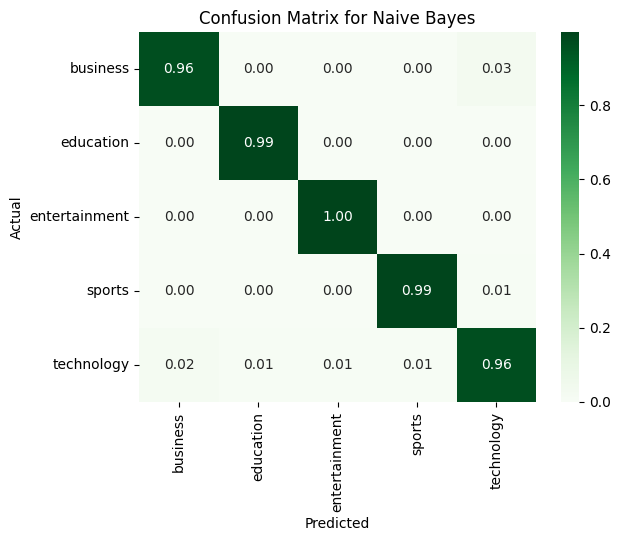

In [63]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_tfidf)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Classification Report:\n", classification_report(y_test_tfidf, y_pred_nb, target_names=categories))
print("Accuracy (Naive Bayes):", accuracy_score(y_test_tfidf, y_pred_nb))

cm_nb = confusion_matrix(y_test_tfidf, y_pred_nb)

cm_normalized_nb = cm_nb.astype('float') / cm_nb.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized_nb, annot=True, fmt='.2f', cmap='Greens', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

full_train, test = train_test_split(df, test_size=0.20, random_state=42)
train, valid = train_test_split(full_train, test_size=0.20, random_state=42)

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices((train['text'], train['category']))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid['text'], valid['category']))
test_dataset = tf.data.Dataset.from_tensor_slices((test['text'], test['category']))

In [33]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b'Australia says hacks surging, state-sponsored groups targeting critical infrastructure Reports of cybercrime surged 23% to more than 94,000 in the financial year to June, the Australian Cyber Security Centre said in its annual threat report on Wednesday. State-sponsored cyber groups and hackers have increased assaults on Australia\xe2\x80\x99s critical infrastructure, businesses and homes, a government report said, adding that its new defence agreement with Britain and the U.S. had likely made it more of a target.\nReports of cybercrime surged 23% to more than 94,000 in the financial year to June, the Australian Cyber Security Centre said in its annual threat report on Wednesday.\nIt estimated there was a hack on Australian assets every six minutes.\nADVERTISEMENT\n\xe2\x80\x9cThe cyber threat continues to grow,\xe2\x80\x9d Defence Minister Richard Marles told ABC Radio. \xe2\x80\x9cWe\xe2\x80\x99re also seeing a greater interest from state actors in Australia\xe2\x80\x99s cri

In [34]:
BUFFER_SIZE = 2500
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [35]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [36]:
import numpy as np

vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'to', 'and', 'in', 'of', 'a', 'for', 'on',
       'is', 'with', 'that', 'at', 'from', 'as', 'have', 'it', 'was',
       'has'], dtype='<U13')

In [37]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [38]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])

In [42]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=valid_dataset)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - loss: 0.7914 - sparse_categorical_accuracy: 0.5695 - val_loss: 0.7536 - val_sparse_categorical_accuracy: 0.5889
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - loss: 0.6944 - sparse_categorical_accuracy: 0.5964 - val_loss: 0.5950 - val_sparse_categorical_accuracy: 0.6162
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 579s 6s/step - loss: 0.5806 - sparse_categorical_accuracy: 0.6245 - val_loss: 0.5356 - val_sparse_categorical_accuracy: 0.6414
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 543s 5s/step - loss: 0.4956 - sparse_categorical_accuracy: 0.6493 - val_loss: 0.8338 - val_sparse_categorical_accuracy: 0.6626
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - loss: 0.7191 - sparse_categorical_accuracy: 0.6655 - val_loss: 0.4444 - val_sparse_categorical_accuracy: 0.6792
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - loss: 0.3802 - sparse_categorical_accuracy: 0.6854 - val_loss: 0.4154 - val_sparse_categorical_accuracy: 0.698

In [43]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - loss: 0.5223 - sparse_categorical_accuracy: 0.7254
Test Loss: 0.5104885697364807
Test Accuracy: 0.7256646752357483


In [49]:
from sklearn.metrics import classification_report, accuracy_score

texts = []
true_labels = []

for text, label in test_dataset.unbatch():
    texts.append(text.numpy().decode('utf-8')) 
    true_labels.append(label.numpy())

predicted_probabilities = model.predict(tf.constant(texts))
predicted_labels = np.argmax(predicted_probabilities, axis=1)

categories = ['business', 'education', 'entertainment', 'sports', 'technology']  
report = classification_report(true_labels, predicted_labels, target_names=categories)
print("RNN Classification Report:\n", report)

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy (RNN):", accuracy)


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step
RNN Classification Report:
                precision    recall  f1-score   support

     business       0.84      0.94      0.88       398
    education       0.99      0.89      0.94       413
entertainment       0.99      0.68      0.80       373
       sports       0.64      0.91      0.75       414
   technology       0.68      0.58      0.62       402

     accuracy                           0.80      2000
    macro avg       0.83      0.80      0.80      2000
 weighted avg       0.83      0.80      0.80      2000

Accuracy (RNN): 0.801


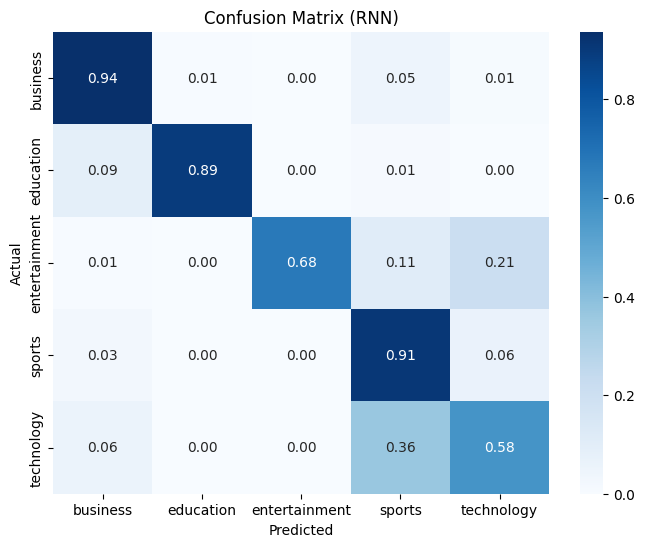

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RNN')
plt.show()


In [83]:
category_mapping = {0: 'business', 1: 'education', 2: 'entertainment', 3: 'sports', 4: 'technology'}

#News taken from Indian Express
real_world_texts = [
    "Hindi cinema’s best to worst in 2024: Of Pushpa 2 and Stree 2, Chamkila and Laapataa Ladies", # Entertainment
    "Nestlé judgement fallout: Switzerland suspends MFN clause in tax avoidance pact with India, could impact $100 bn investment commitment under EFTA deal",# Business
    "India vs Australia LIVE Cricket Score, 3rd Test: Rain stops play in Brisbane, AUS 19/0 vs IND", # Sports
    "US lawmakers tell Apple, Google to be ready to remove TikTok from app stores on January 19", # Technology
    "Advancements in AI are transforming how technology is integrated into daily life.", # Technology
    "Trump calls daylight saving time ‘very costly to Nation,’ demands it end.", #Political
    "How Bangladesh’s Constitution was adopted and what it says about minority rights.", #Research
    "UPSC Essentials | Daily subject-wise quiz : International Relations MCQs on ‘Our Living Islands’ policy, Levant and more." #Education
]

synthesized_texts = [
    "The company's profits increased by 30% this quarter.",  # Business
    "Online learning platforms are transforming education.",  # Education
    "An award-winning actor delivered a memorable performance.",  # Entertainment
    "The cricket match was a nail-biter till the last over.",  # Sports
    "Tech giants are unveiling new products at the annual conference."  # Technology
]


In [85]:
models = [lr_model, nb_model, model]  
model_names = ["Logistic Regression", "Naive Bayes", "RNN"]

for i, current_model in enumerate(models):
    print(f"\n=== Predictions Using {model_names[i]} ===")

    print("\nReal-World Examples:")
    for text in real_world_texts:
        if model_names[i] in ["Logistic Regression", "Naive Bayes","RNN"]:  
            text_vectorized = tfidf_vectorizer.transform([text]) 
            prediction = current_model.predict(text_vectorized)
            predicted_category = prediction[0] 
        else: 
            prediction = current_model.predict(tf.constant([text])) 
            predicted_category = np.argmax(prediction, axis=-1)[0]
        
        print(f"Text: {text}")
        print(f"Predicted Category: {category_mapping[predicted_category]}")
        print("---")
  
    print("\nSynthesized Examples:")
    for text in synthesized_texts:
        if model_names[i] in ["Logistic Regression", "Naive Bayes","RNN"]: 
            text_vectorized = tfidf_vectorizer.transform([text]) 
            prediction = current_model.predict(text_vectorized)
            predicted_category = prediction[0]
        else:  
            prediction = current_model.predict(tf.constant([text]))
            predicted_category = np.argmax(prediction, axis=-1)[0]
        
        print(f"Text: {text}")
        print(f"Predicted Category: {category_mapping[predicted_category]}")
        print("---")



=== Predictions Using Logistic Regression ===

Real-World Examples:
Text: Hindi cinema’s best to worst in 2024: Of Pushpa 2 and Stree 2, Chamkila and Laapataa Ladies
Predicted Category: entertainment
---
Text: Nestlé judgement fallout: Switzerland suspends MFN clause in tax avoidance pact with India, could impact $100 bn investment commitment under EFTA deal
Predicted Category: business
---
Text: India vs Australia LIVE Cricket Score, 3rd Test: Rain stops play in Brisbane, AUS 19/0 vs IND
Predicted Category: sports
---
Text: US lawmakers tell Apple, Google to be ready to remove TikTok from app stores on January 19
Predicted Category: technology
---
Text: Advancements in AI are transforming how technology is integrated into daily life.
Predicted Category: technology
---
Text: Trump calls daylight saving time ‘very costly to Nation,’ demands it end.
Predicted Category: sports
---
Text: How Bangladesh’s Constitution was adopted and what it says about minority rights.
Predicted Category: 

In [100]:
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

categories = ['business', 'education', 'entertainment', 'sports', 'technology']

zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

real_world_texts = [
    "Hindi cinema’s best to worst in 2024: Of Pushpa 2 and Stree 2, Chamkila and Laapataa Ladies", # Entertainment
    "Nestlé judgement fallout: Switzerland suspends MFN clause in tax avoidance pact with India, could impact $100 bn investment commitment under EFTA deal",# Business
    "India vs Australia LIVE Cricket Score, 3rd Test: Rain stops play in Brisbane, AUS 19/0 vs IND", # Sports
    "US lawmakers tell Apple, Google to be ready to remove TikTok from app stores on January 19", # Technology
    "UPSC Essentials | Daily subject-wise quiz : International Relations MCQs on ‘Our Living Islands’ policy, Levant and more." #Education
]

synthesized_texts = [
    "The company's profits increased by 30% this quarter.",  # Business
    "Online learning platforms are transforming education.",  # Education
    "An award-winning actor delivered a memorable performance.",  # Entertainment
    "The cricket match was a nail-biter till the last over.",  # Sports
    "Tech giants are unveiling new products at the annual conference."  # Technology
]

all_texts = real_world_texts + synthesized_texts

true_labels = [
    'business', 'education', 'entertainment', 'sports', 'technology',  # Real-world labels
    'business', 'education', 'entertainment', 'sports', 'technology'   # Synthesized labels
]

predictions = []

print("Predictions:")
for text in all_texts:
    result = zero_shot_classifier(text, candidate_labels=categories)
    predicted_category = result['labels'][0]
    predictions.append(predicted_category)
    print(f"Text: {text}")
    print(f"Predicted Category: {predicted_category}")
    print("---")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.decoder.version', 'model.encoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.


Predictions:
Text: Hindi cinema’s best to worst in 2024: Of Pushpa 2 and Stree 2, Chamkila and Laapataa Ladies
Predicted Category: entertainment
---
Text: Nestlé judgement fallout: Switzerland suspends MFN clause in tax avoidance pact with India, could impact $100 bn investment commitment under EFTA deal
Predicted Category: business
---
Text: India vs Australia LIVE Cricket Score, 3rd Test: Rain stops play in Brisbane, AUS 19/0 vs IND
Predicted Category: sports
---
Text: US lawmakers tell Apple, Google to be ready to remove TikTok from app stores on January 19
Predicted Category: technology
---
Text: UPSC Essentials | Daily subject-wise quiz : International Relations MCQs on ‘Our Living Islands’ policy, Levant and more.
Predicted Category: education
---
Text: The company's profits increased by 30% this quarter.
Predicted Category: business
---
Text: Online learning platforms are transforming education.
Predicted Category: education
---
Text: An award-winning actor delivered a memorable


Classification Report for Zero-Shot Classification:
               precision    recall  f1-score   support

     business       0.50      0.50      0.50         2
    education       0.50      0.50      0.50         2
entertainment       0.50      0.50      0.50         2
       sports       0.50      0.50      0.50         2
   technology       0.50      0.50      0.50         2

     accuracy                           0.50        10
    macro avg       0.50      0.50      0.50        10
 weighted avg       0.50      0.50      0.50        10



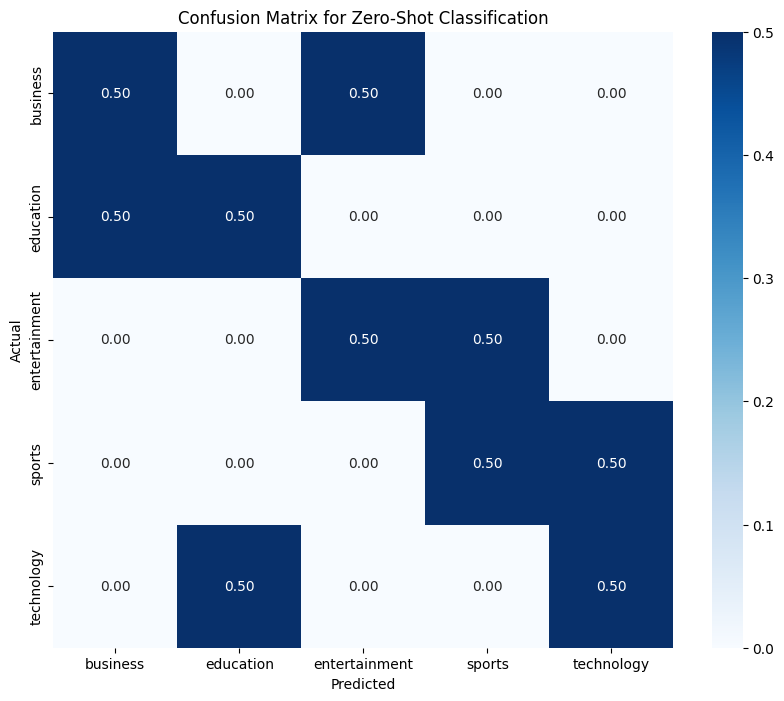

In [102]:
if len(true_labels) == len(predictions):
    print("\nClassification Report for Zero-Shot Classification:")
    print(classification_report(true_labels, predictions, target_names=categories))

cm = confusion_matrix(true_labels, predictions, labels=categories)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Zero-Shot Classification')
plt.show()